# Press the Double Arrow above to Begin, then click red pop-up to confirm

In [1]:
import ipython_blocking # enables %block and %blockrun magic
import matplotlib 

In [2]:
display("Loading Allen Transcriptomics Single-Cell RNAseq data, retreived May 2020. Be patient, it's loading!")

"Loading Allen Transcriptomics Single-Cell RNAseq data, retreived May 2020. Be patient, it's loading!"

In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [4]:
import ipywidgets as widgets
import pandas as pd
import io
import seaborn as sns
import dropbox
from IPython.display import display
from ipywidgets import interact_manual, interactive,GridspecLayout, AppLayout, Button, Layout



##get data from dropbox
DBX = dropbox.Dropbox('bb3H-rx_L8IAAAAAAAAPdR77ZBO4BYfjelCVEH8kkSj04MX4vx4RrPFfN0cfJ3tm')

_, res = DBX.files_download("/human_means.csv")

with io.BytesIO(res.content) as stream:
    human_means = pd.read_csv(stream, index_col=0)

_, res2 = DBX.files_download("/mouse_medians.csv")
with io.BytesIO(res2.content) as stream:
    meds = pd.read_csv(stream, index_col=0)   
    

# Get all gene and cell type names: HUMAN
human_listOfColumnNames = list(human_means.columns.values)
human_idx = list(human_means.index)
# Get all gene and cell type: MOUSE
mouse_listOfColumnNames = list(meds.columns.values)
idx = list(meds.index)




In [6]:
display("Collecting the data from Allen")

'Collecting the data from Allen'

In [22]:
##define GUI
table_style = {'description_width': 'initial'}
useidx = ('choose species','then genes will appear')
spacer = widgets.Label('')

from threading import Timer

from traitlets import traitlets

class LoadedButton(widgets.Button):
    """A button that can hold a value as a attribute."""

    def __init__(self, value=None, *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        # Create the value attribute.
        self.add_traits(value=traitlets.Any(value))
#####################################################        
        
        

genes = []
genetitle = widgets.Label('Select Genes')
dropdown =  widgets.Combobox(
    options= idx,
    description='Gene',
    placeholder='Type here',
    layout={'width': '80%'})

def delay():
    gene_button.button_style = ''
    gene_button.disabled = False
    
def choose_gene(change):
    if len(genes)<=7:
        gene_button.button_style = 'success'
        gene_button.disabled = True
        genes.append(dropdown.value)     
        d = Timer(0.5,delay)
        d.start()
    if len(genes)>7:       
        gene_button.button_style = 'warning'
        gene_button.description = "Max Genes Selected"
        gene_button.disabled = True
        
gene_button = widgets.Button(description = 'Enter Gene', button_style = '')
gene_button.on_click(choose_gene)

analysislabel = widgets.Label('Graph Type')        
def on_exp_button_clicked(exp):
    exp.value = "exp"
    venn.disabled = True
    exp.button_style = 'success'
    graphtype = "Exp"


def on_venn_button_clicked(venn):
    venn.value = "venn"
    venn.button_style = 'success'
    exp.disabled = True
    graphtype = "Venn"
    
exp = LoadedButton(description="Expression Level", value="not exp")
exp.on_click(on_exp_button_clicked)         

venn = LoadedButton(description="Venn Diagram", value="not venn")
venn.on_click(on_venn_button_clicked)


choicelabel = widgets.Label('Analyze species:')
msCells = widgets.Button(
    description='Mouse',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    width = '110%')

huCells = widgets.Button(
    description='Human',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    width = '110%')

#####################################################

    
    
mscelllabel = widgets.Label('Mouse Cell Clusters:')
msCells_drop =widgets.SelectMultiple(
    options=mouse_listOfColumnNames,
    disabled=True,
    rows=17,
    layout={'width': 'max-content'},
    #style=table_style
) 

hucelllabel = widgets.Label('Human Cell Clusters:')
huCells_drop =widgets.SelectMultiple(
    options=human_listOfColumnNames,
    disabled=True,
    rows=17,
    layout={'width': 'max-content'},
    #style=table_style
) 

def choose_mouse(msCells):
    huCells.disabled = True
    msCells.button_style = 'success'
    msCells_drop.disabled = False
    huCells_drop.disabled = True 
    msCells.value = "mouse"

msCells.on_click(choose_mouse)

def choose_human(huCells):
    huCells.button_style = 'success'
    msCells.disabled = True
    msCells_drop.disabled = True
    huCells_drop.disabled = False
    huCells.value = "human"
    dropdown.options = human_idx

huCells.on_click(choose_human)

msCells = LoadedButton(description="Mouse", value="not mouse")
msCells.on_click(choose_mouse)   

huCells = LoadedButton(description="Human", value="not human")
huCells.on_click(choose_human) 
dropdown.observe(choose_human, 'change')
########################################

go_button = widgets.Button(description = 'Produce Output', 
                           button_style = 'success', 
                            display='flex',
                            flex_flow='column',
                            align_items='stretch')
reset_button = widgets.Button(description = 'Reset Options',
                              button_style = 'warning',
                            display='flex',
                            flex_flow='column',
                            align_items='stretch',
                             width = 'auto')

from ipywidgets import Widget
cells =[]
def on_go_button_clicked(go_button):
    if huCells.value == 'human':
        cells.append(huCells_drop.value)
    else:
        cells.append(msCells_drop.value)
    Widget.close_all()

def on_reset_button_clicked(reset_button):  
    Widget.close_all()
    
go_button.observe(huCells, 'value')    
go_button.on_click(on_go_button_clicked)
reset_button.on_click(on_reset_button_clicked)

spacervenn = widgets.VBox([spacer,venn])
specieschoices = widgets.VBox([choicelabel,msCells, mscelllabel, msCells_drop])
spacerhuman = widgets.VBox([spacer, huCells,hucelllabel, huCells_drop])
genesbox = widgets.VBox([genetitle,dropdown, gene_button])
buttons = widgets.HBox([go_button, spacer, reset_button])
graphchoices = widgets.VBox([analysislabel, exp, venn, spacer, spacer, spacer, genesbox, spacer, spacer, buttons])
graphs2 = widgets.HBox([graphchoices])
####################################################
display("GUI Accomplished")

In [9]:
#display("Preparing User Interface")

'Preparing User Interface'

In [23]:
### cell #1

box_layout = widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px',
        height='auto', width='auto')

grid = GridspecLayout(1, 3)
grid.layout = box_layout
# fill it in with widgets
grid[0,0] = specieschoices
grid[0,1] = spacerhuman
grid[0, 2:] = graphs2
grid

GridspecLayout(children=(VBox(children=(Label(value='Analyze species:'), LoadedButton(description='Mouse', sty…

In [ ]:
### cell #2
%blockrun go_button

In [24]:
### cell #3
if msCells.value == 'mouse':
    bigframe = meds
    cells = msCells_drop.value
if huCells.value == 'human':
    bigframe = human_means
    cells = huCells_drop.value

newdf = pd.DataFrame(columns = ['Cells','Genes','Expression'])
newdf['Cells'] = cells * len(genes)


genelist=[]
for i in range(len(genes)):
    genea = [genes[i]]*len(cells)
    genelist.append(genea)
flat_geneslist = [item for sublist in genelist for item in sublist]
newdf['Genes'] = flat_geneslist

expressions =[]
for i in range(len(genes)*len(cells)):
    value1 = bigframe.loc[newdf['Genes'][i], newdf['Cells'][i]]
    expressions.append(value1)
newdf['Expression'] = expressions

if len(newdf['Expression'])>0:
    maxm = max(newdf["Expression"])

In [25]:
#display("Your Results as an Array")

In [26]:
#display(newdf)
import openpyxl
newdf.to_excel('Output.xlsx') 

In [27]:
print("Genes: ", genes)
print("cells: ",cells)
print("Venn?: ", venn.value)
print("Exp Graph?: ",exp.value)

Genes:  ['Adcyap1r1', 'Sst', 'Gapdh']
cells:  ('Sst_7', 'Sst_9', 'Sst_11')
Venn?:  not venn
Exp Graph?:  exp


In [28]:
display("Preparing Graph")

'Preparing Graph'

<IPython.core.display.Javascript object>


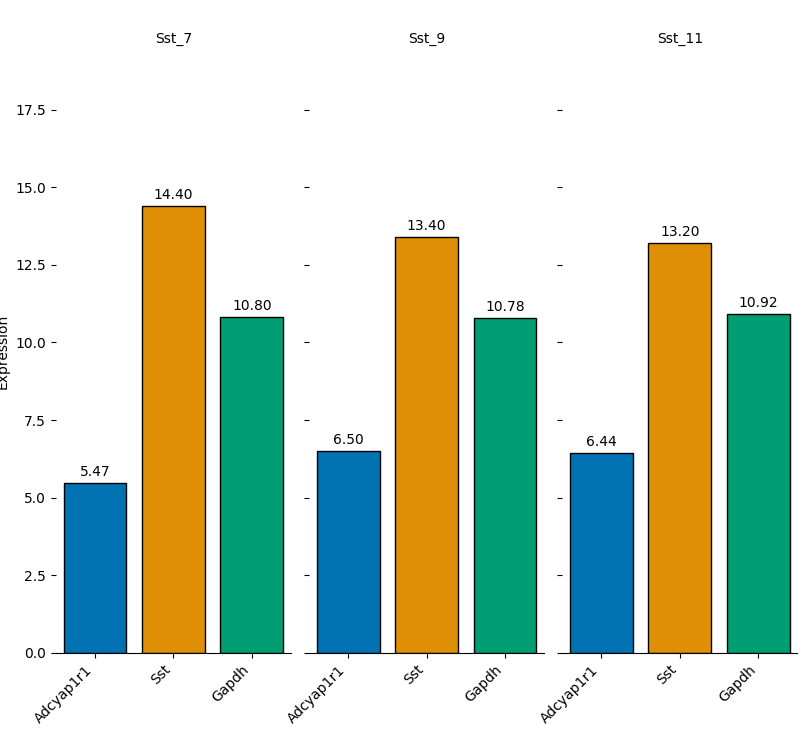

In [32]:
###Now graph it####################################################
%matplotlib notebook

if exp.value == 'exp':   
    sns.set_palette("colorblind", 10)
    g = sns.catplot(x="Genes", y="Expression", col="Cells",
                    data=newdf, 
                    saturation=1,
                    kind="bar", 
                    ci=None, 
                    aspect=.6, 
                    edgecolor="k", 
                    linewidth=1
                   )
    
    
    (g.set_axis_labels("", "Expression")
      .set_xticklabels(genes)
      .set_titles("{col_name}")
      .set(ylim=(0, (maxm + 5)))
      .despine(left=True))  

    for ax in g.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        for p in ax.patches:
            ax.annotate('%.2f' % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 

                        ha='center', va='center', xytext=(0, 8), 
                        textcoords='offset points')


In [ ]:
if venn.value == 'venn':       
    if msCells.value == 'mouse':
        venny = meds.loc[genes]
    if huCells.value == 'human':
        venny = human_means.loc[genes]

        
    if len(genes) == 2:
        for col in venny[genes[0]]:
            print(col)
        gene1x = venny.loc[(venny[genes[0],:] >= 0.5)]
        g1_only = venny.loc[(venny[genes[0],:] >= 0.5) & (venny[genes[1],:] < 0.5)].reset_index()
        g1_cells = g1_only['index'].to_list()        

    
    
    
    
    if len(genes) == 2:
        gene1x = venny.loc[(venny[genes[0],:] >= 0.5)]
        g1_only = venny.loc[(venny[genes[0],:] >= 0.5) & (venny[genes[1],:] < 0.5)].reset_index()
        g1_cells = g1_only['index'].to_list()


        gene2x = venny.loc[(venny[genes[1],:] >= 0.5)]
        g2_only = venny.loc[(venny[genes[1],:] >= 0.5) & 
                        (venny[genes[0],:] < 0.5)].reset_index()[genes[1]]
        g2_cells = g2_only['index'].to_list()


        overlaps = venny.loc[(venny[genes[0],:] >= 0.5) & 
                             (venny[genes[1],:] >= 0.5)].reset_index()['index'].to_list()
        ovs = venny.loc[(venny[genes[0],:] >= 0.5) & 
                             (venny[genes[1],:] >= 0.5)]

    if len(Outputs['Genes']) == 3:
        gene1x = venny.loc[(venny[genes[0],:] >= 0.5)]
        g1_only = venny.loc[(venny[genes[0],:] >= 0.5) & (venny[genes[1],:] < 0.5) & (venny[genes[2],:] < 0.5)].reset_index()
        g1_cells = g1_only['index'].to_list()


        gene2x = venny.loc[(venny[genes[1],:] >= 0.5)]
        g2_only = venny.loc[(venny[genes[1],:] >= 0.5) & (venny[genes[2],:] < 0.5) & (venny[genes[0],:] < 0.5)].reset_index()
        g2_cells = g2_only['index'].to_list()

        gene3x = venny.loc[(venny[genes[2],:] >= 0.5)]
        g3_only = venny.loc[(venny[genes[2],:] >= 0.5) & (venny[genes[1],:] < 0.5) & (venny[genes[0],:] < 0.5)].reset_index()
        g3_cells = g3_only['index'].to_list()

        ov_AB = venny.loc[(venny[genes[0],:] >= 0.5) & 
                             (venny[genes[1],:] >= 0.5)]    
        overlapsAB = ov_AB.reset_index()['index'].to_list()       
        ov_BC = venny.loc[(venny[genes[1],:] >= 0.5) & 
                             (venny[genes[2],:] >= 0.5)]    
        overlapsBC = ov_BC.reset_index()['index'].to_list()  
        ov_AC = venny.loc[(venny[genes[0],:] >= 0.5) & 
                             (venny[genes[2],:] >= 0.5)]
        overlapsAC = ov_AC.reset_index()['index'].to_list() 
        ov_ABC = venny.loc[(venny[genes[0],:] >= 0.5) &  (venny[genes[1]] >= 0.5) &
                             (venny[genes[2],:] >= 0.5)]    
        overlapsABC = ov_ABC.reset_index()['index'].to_list()


    from matplotlib_venn import venn2
    from matplotlib_venn import venn3
    from matplotlib import pyplot as plt

    gene1 = genes[0]
    gene2 = genes[1]
    if len(genes) == 3:
        gene3 = genes[2]


    if len(genes) == 3:
        labels = ["Cells containing " + genes[0],"Cells containing " 
                  + genes[1], "Cells containing " + genes[2] ]
        v = venn3([set(gene1x.index), set(gene2x.index), set(gene3x.index)], 
                  set_labels = (gene1, gene2, gene3))


    if len(genes) == 2:
        labels = ["Cells containing " + genes[0],"Cells containing " + genes[1] ]
        v = venn2([set(gene1x.index), set(gene2x.index)], set_labels = (gene1, gene2))
        if labels_yn == True:
            v.get_label_by_id('10').set_text('\n'.join(g1_cells))
            v.get_label_by_id('01').set_text('\n'.join(g2_cells))
            v.get_label_by_id('11').set_text('\n'.join(overlaps))

    plt.title('Cell type by gene overlap\n')
    plt.show()

In [ ]:
    gene1x =[]
    if len(genes) == 2:
        for index, row in venny.iterrows():
            display(row[index])
            if row[index] >= 0.5:
                gene1x.append(index)
            #for key in row.keys():
                #print(row.get(key))
    print(gene1x)